In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
#path = Path('/home/ubuntu/data/autopsy/milestone/suicide_homicide_accident/no_preprocessing')

path = Path('/home/ubuntu/data/autopsy')


In [4]:
df = pd.read_csv(path/'data.csv')
df.head()

,label,text,is_valid
0,Homicide,\n.MICRO.\nHEART: acute hemorrhages in the epi...,False
1,Suicide,\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging...,False
2,Homicide,\n.MICRO.\nLIVER: Moderate macrovesicular stea...,False
3,Homicide,\n.MICRO.\nHeart:\nNo significant histopatholo...,False
4,Homicide,\n.MICRO.\nNONE\n.LOCATIONTrunk\n.INJURYFirear...,False


In [5]:
df.tail()

,label,text,is_valid
3037,Suicide,\n.MICRO.\nNONE\n.LOCATIONExtremity\n.INJURYBl...,False
3038,Suicide,\n.MICRO.\nHeart: Negative\n\nLungs: Pulmonary...,False
3039,Suicide,\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging...,False
3040,Suicide,\n.MICRO.\nHEART: There is patchy perivascula...,False
3041,Homicide,"\n.MICRO.\nHeart: No significant, histopatholo...",False


In [6]:
df['text'][1]

'\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.'

In [7]:
df['text'][0]

'\n.MICRO.\nHEART: acute hemorrhages in the epicardial adipose tissue, otherwise, no significant histopathologic diagnosis\n\nLUNG: patchy intra-alveolar macrophages, scattered foci of intra-alveolar erythrocytes\n\nLIVER: bridging fibrosis/early cirrhosis with prominent lobular steatosis and mild chronic periportal inflammation; focal interface hepatitis and bile ductular reaction\n\nKIDNEY: no significant histopathologic diagnosis\n\nESOPHAGUS: intact squamous mucosa with submucosal and intramuscular acute hemorrhages\n\nTHYROID: acute hemorrhage of the soft tissue adjacent to the thyroid gland, otherwise no significant histopathologic diagnosis\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nA 3 x 1.5 cm, irregular laceration is on the left frontal scalp, with an irregular marginal abrasion extending up to 0.6 cm from the edge of the wound. A 7.5 x 0.3 cm linear, horizontal laceration is on the central frontal scalp, with an irregular pink marginal abrasion extending up to 0.5 c

In [8]:
df['text'][2]

"\n.MICRO.\nLIVER: Moderate macrovesicular steatosis\n\nBRAIN, LUNGS, KIDNEYS, HEART: no significant histopathology\n.LOCATIONTrunk\n.INJURYFirearm injury.\n.INJURYDESC.\nGUNSHOT WOUND OF BACK/TRUNK, INDETERMINATE RANGE:\n\nEntrance:\n\nOn the left mid back, 7.5 cm left of posterior midline and 50 cm below the top of the head, is an entrance gunshot wound consisting of a 0.8 x 0.8 cm round defect with 0.2 cm wide circumferential marginal abrasion. Soot, unburned gunpowder particles and gunpowder stippling are not visible on the skin surrounding the wound.\n\nPath:\n\nThe hemorrhagic wound track sequentially perforates the skin and subcutaneous tissues of the left mid back, the tenth thoracic vertebral body (T10), the diaphragm, the right lobe of the liver, the diaphragm, the lower lobe of the right lung, and the sixth lateral right intercostal space, and penetrates the soft tissue of the right flank where the missile comes to rest. \n\nAssociated injuries include scant hemoperitoneum.\

In [9]:
df['text'][4]

"\n.MICRO.\nNONE\n.LOCATIONTrunk\n.INJURYFirearm injury.\n.INJURYDESC.\nNOTE: The wounds are described in an arbitrary order which does not imply sequence or severity.  Wound tracks are described for a body at rest in the anatomic position.)\n\n.LOCATIONTrunk\n.INJURYFirearm injury.\n.INJURYDESC.\nEntrance: On the upper chest, centered approximately 14 inches below the top of the head and 3 inches right of anterior midline, is an entrance gunshot wound, consisting of a 3/8 inch round defect with circumferential, 1/8 to 1/4 inch, dark red marginal abrasion and a 1/8 inch rim of purple ecchymosis extending from the wound edges. No soot, stippling, or unburned gunpowder particles are visible on the skin surrounding this wound.\n\nExit: None.\n\nTerminus: The wound track terminates in the subcutaneous tissue of the upper back, centered approximately 10 inches below the top of the head and 2 inches right of posterior midline.\n\nPath: The hemorrhagic wound track involves the skin, subcutane

In [10]:
df['text'][3038]

'\n.MICRO.\nHeart: Negative\n\nLungs: Pulmonary edema\n\nLiver: Negative\n\nKidney: Negative\n\nBrain: Intraparenchymal and subarachnoid hemorrhage of cerebellum \n.LOCATIONHead\n.INJURYFirearm injury.\n.INJURYDESC.\nGunshot wound of head:\n\nEntrance: on the right temporal scalp, is a 2.5 x 1.5 entrance gunshot wound with a circumferential marginal abrasion and discontinuous muzzle imprint. Soot is present on the wound margin.\n\nPath: right temporal skull (soot on outer table, internal beveling), right temporal lobe, basal ganglia, left temporal lobe\n\nAssociated injuries: right periorbital contusion and medial canthus laceration, extensive fragmentation of base of brain, numerous skull fractures including bilateral anterior and middle cranial fossae, diffuse subarchnoid and thin bilateral subdural hemorrhage\n\nNo Exit:\n\nRecovery:25.6 grain deformed jacketed missile recovered from left occipital lobe\n\nTrajectory: right to left and backward\n\nHands: negative'

In [11]:
df['text'][3040]

'\n.MICRO.\nHEART:  There is patchy perivascular fibrosis.  Some myocyte nuclei are enlarged and irregular.\n\nLUNGS:  Patchy intra-alveolar edema, congestion.\n\nKIDNEY:  There is some thickening of artery muscular walls.  There is a rare globally sclerotic glomeruli.\n\nLIVER:  Periortal fibrosis is bridging and contains inflammation consisting predominantly of lymphocytes.  Steatosis is moderate to severe.\n\nBRAIN:  No significant histopathologic diagnosis.\n.LOCATIONExtremity\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the right posterior hand is a 0.8 cm linear oblique orange red superficial abrasion.  The left lateral hand has a 1.0 cm linear oblique orange red superficial abrasion.'

In [12]:
df['text'][3041]

'\n.MICRO.\nHeart: No significant, histopathologic findings\n\nLungs: Atelectasis; focal collections of brown-pigmented, intra-alveolar macrophages\n\nKidneys: No significant, histopathologic findings\n\nLiver: Mild to moderate, predominantly lymphocytic, portal inflammation and mild, fibrous, portal expansion \n\nHippocampus: No significant, histopathologic findings\n.LOCATIONExtremities\n.INJURYBlunt injury.\n.INJURYDESC.\nRIGHT UPPER EXTREMITY\nThere are red to orange, linear to irregular abrasions in an 18 x 4.5 cm area of the right lateral arm and right posterior forearm. \n\nThere is a 0.3 x 0.2 cm, red abrasion of the dorsal right hand, in the region of the fifth distal metacarpal.\n\nThere is a 7 x 6 cm cluster of purple contusions of the anterior right shoulder. \n\n\nLEFT UPPER EXTREMITY\nThere are scattered, red, 0.1 cm to 0.4 cm in greatest dimension abrasions of the dorsal left hand.\n\n\nLEFT LOWER EXTREMITY\nThere is a 5 x 3.5 cm cluster of red abrasions of the left ante

In [13]:
bs=32

In [14]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv', bs=bs)

In [15]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxmaj heart - no significant histopathology \n\n xxmaj lungs - patchy extravasation of red blood cells into the intra - alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - no significant histopathology \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj xxunk - vaginal , anal , and oral smears negative for xxunk components . \n .locationhead and neck \n",Homicide
xxbos \n xxup .micro . \n xxmaj heart : xxmaj some of the cardiomyocyte nuclei are slightly enlarged . \n\n xxmaj lungs : xxmaj partially atelectatic with rare intra - alveolar macrophages . \n\n xxmaj liver : xxmaj mild lymphoplasmacytic inflammation confined to portal tracts . \n\n xxmaj kidney : xxmaj partially autolyzed with no significant histopathologic abnormalities . \n\n xxmaj brain : xxmaj no significant histopathologic abnormalities . \n\n,Homicide
"xxbos \n xxup .micro . \n xxmaj heart , xxmaj brain : xxmaj no significant histopathologic diagnosis . \n\n xxmaj lungs : xxmaj skeletal muscle within bronchi and bronchioles \n\n xxmaj liver : xxmaj autolysis . xxmaj mild increase of chronic periportal inflammation . \n\n xxmaj kidney : xxmaj occasional dilated tubule with intratubular calcifications or orange - red debris . xxmaj tubular autolysis . \n .locationextremity \n .injurysharp injury",Homicide
"xxbos \n xxup .micro . \n xxup none \n .locationhead \n .injurysharp injury . \n xxup .injurydesc . \n xxup stab xxup wound a \n\n xxmaj located on the right side of the forehead , superior to the right eyebrow , is a 2.0 cm obliquely oriented located 5.0 cm from the top of the head at vertex and 7.5 cm right of the anterior midline , with sharp ends",Homicide
xxbos \n xxup .micro . \n xxmaj heart : a few slightly enlarged cardiomyocyte nuclei are present . \n\n xxmaj lungs : xxmaj multiple alveoli are filled with degenerating erythrocytes and a few macrophages . \n\n xxmaj liver : xxmaj no significant histopathologic findings . \n\n xxmaj kidney : xxmaj no significant histopathologic findings . \n\n xxmaj brain : xxmaj no significant histopathologic findings . \n\n .locationother \n .injuryother .,Homicide


In [16]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, qrnn=True, emb_sz=300, nh=198, nl=1)


In [17]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.693497,0.654570,0.609195
2,0.655506,0.916541,0.338259
3,0.631335,0.786231,0.418719
4,0.596598,0.645547,0.627258
5,0.585234,0.618787,0.697865
6,0.579838,0.456145,0.801314
7,0.589834,0.466577,0.845649
8,0.563170,0.397826,0.834154
9,0.532302,0.376905,0.876847
10,0.517729,0.387657,0.886699


In [18]:
from fastai.vision import *

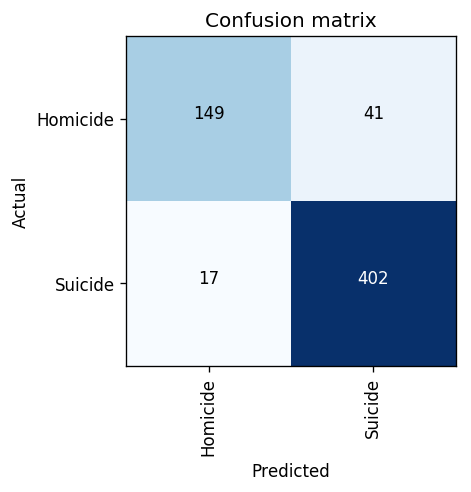

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

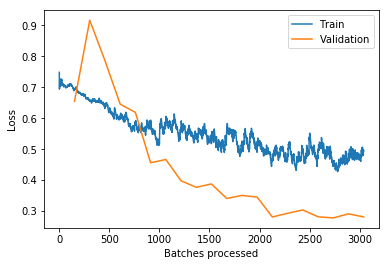

In [20]:
learn.recorder.plot_losses()

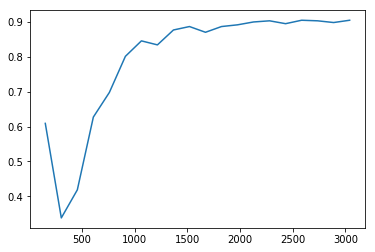

In [21]:
learn.recorder.plot_metrics()

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data_clas.valid_ds)==len(losses)==len(idxs)

True

In [23]:
idxs

tensor([205, 120, 209, 443,  93,  86,  24, 483, 184, 438, 243, 298, 142, 299,
        227, 103, 329, 145, 163, 186, 459, 202, 177, 144, 164, 259, 179,  79,
        383,  89, 335,  83, 229, 175, 147,  95, 189, 106, 566, 168, 207, 107,
        156, 100, 193, 199,  22, 393, 543,  66, 324, 392, 213, 112, 239, 126,
        272, 376, 217, 119, 287, 115,  98, 308,   1, 391, 183, 444, 215, 303,
        149,  63, 409, 113, 194,  84, 423, 218, 290, 159, 366, 247,  74, 192,
         54, 121, 516,  55, 219, 234, 129, 196,   6,  85, 328,  49, 360,  59,
        295,  91,  77, 223,  58, 211, 188, 419, 151, 181, 274,   0, 108, 278,
         67, 436, 280, 165, 286,  12,  75,  43, 160,  80,  30, 122, 137, 233,
        197, 222, 166, 418,  88, 468, 456,  69,   4,  28, 264, 357, 469,   9,
          5, 504, 111, 127, 336, 152,  42, 267,  21, 140, 236, 187, 254,  14,
        133,  87, 307, 492, 204, 200,  16, 105, 136, 351, 201, 363,   3,  56,
         19, 586, 380, 102,  17,  48, 125, 359,   7, 130, 176, 1

In [25]:
learn.recorder.losses

[tensor(0.7482),
 tensor(0.7026),
 tensor(0.6941),
 tensor(0.7045),
 tensor(0.7223),
 tensor(0.7129),
 tensor(0.7140),
 tensor(0.7165),
 tensor(0.7250),
 tensor(0.7269),
 tensor(0.7202),
 tensor(0.7095),
 tensor(0.7055),
 tensor(0.7032),
 tensor(0.7033),
 tensor(0.7055),
 tensor(0.7092),
 tensor(0.7162),
 tensor(0.7202),
 tensor(0.7177),
 tensor(0.7172),
 tensor(0.7232),
 tensor(0.7211),
 tensor(0.7266),
 tensor(0.7243),
 tensor(0.7198),
 tensor(0.7200),
 tensor(0.7190),
 tensor(0.7159),
 tensor(0.7122),
 tensor(0.7115),
 tensor(0.7094),
 tensor(0.7084),
 tensor(0.7063),
 tensor(0.7068),
 tensor(0.7095),
 tensor(0.7075),
 tensor(0.7115),
 tensor(0.7098),
 tensor(0.7064),
 tensor(0.7061),
 tensor(0.7053),
 tensor(0.7046),
 tensor(0.7013),
 tensor(0.7044),
 tensor(0.7058),
 tensor(0.7042),
 tensor(0.7029),
 tensor(0.7047),
 tensor(0.7054),
 tensor(0.7073),
 tensor(0.7075),
 tensor(0.7070),
 tensor(0.7057),
 tensor(0.7045),
 tensor(0.7059),
 tensor(0.7047),
 tensor(0.7038),
 tensor(0.7023

In [26]:
learn.recorder.val_losses

[0.6545698,
 0.9165414,
 0.78623074,
 0.6455469,
 0.6187868,
 0.45614538,
 0.46657684,
 0.39782557,
 0.37690476,
 0.38765654,
 0.34079602,
 0.3505355,
 0.34520358,
 0.28090224,
 0.2928222,
 0.30368286,
 0.2815211,
 0.27788156,
 0.29099983,
 0.2811101]

In [47]:
learn.get_preds()

[tensor([[0.6141, 0.3859],
         [0.5173, 0.4827],
         [0.7993, 0.2007],
         ...,
         [0.0058, 0.9942],
         [0.0020, 0.9980],
         [0.0198, 0.9802]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
         0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
         1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
         1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
         1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
         1, 

In [31]:
learn.recorder.nb_batches

[152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152,
 152]

In [32]:
import matplotlib.pyplot as plt

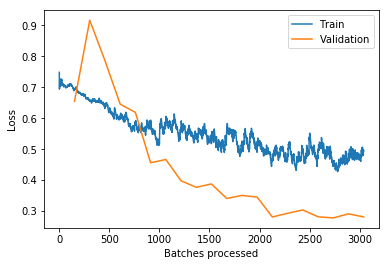

In [37]:

last = ifnone(None,len(learn.recorder.nb_batches))

_, ax = plt.subplots(1,1)
l_b = np.sum(learn.recorder.nb_batches[-last:])
iterations = range_of(learn.recorder.losses)[-l_b:]
ax.plot(iterations, learn.recorder.losses[-l_b:], label='Train')
val_iter = learn.recorder.nb_batches[-last:]
val_iter = np.cumsum(val_iter)+np.sum(learn.recorder.nb_batches[:-last])
ax.plot(val_iter, learn.recorder.val_losses[-last:], label='Validation')
ax.set_ylabel('Loss')
ax.set_xlabel('Batches processed')
ax.legend()

In [38]:
np.cumsum(val_iter)

array([  152.,   456.,   912.,  1520.,  2280.,  3192.,  4256.,  5472.,  6840.,  8360., 10032., 11856., 13832., 15960.,
       18240., 20672., 23256., 25992., 28880., 31920.])

In [39]:
val_iter

array([ 152.,  304.,  456.,  608.,  760.,  912., 1064., 1216., 1368., 1520., 1672., 1824., 1976., 2128., 2280., 2432.,
       2584., 2736., 2888., 3040.])

In [41]:
len(iterations)

3040

In [43]:
learn.recorder.losses[-l_b:]

'[tensor(0.7482), tensor(0.7026), tensor(0.6941), tensor(0.7045), tensor(0.7223), tensor(0.7129), tensor(0.7140), tensor(0.7165), tensor(0.7250), tensor(0.7269), tensor(0.7202), tensor(0.7095), tensor(0.7055), tensor(0.7032), tensor(0.7033), tensor(0.7055), tensor(0.7092), tensor(0.7162), tensor(0.7202), tensor(0.7177), tensor(0.7172), tensor(0.7232), tensor(0.7211), tensor(0.7266), tensor(0.7243), tensor(0.7198), tensor(0.7200), tensor(0.7190), tensor(0.7159), tensor(0.7122), tensor(0.7115), tensor(0.7094), tensor(0.7084), tensor(0.7063), tensor(0.7068), tensor(0.7095), tensor(0.7075), tensor(0.7115), tensor(0.7098), tensor(0.7064), tensor(0.7061), tensor(0.7053), tensor(0.7046), tensor(0.7013), tensor(0.7044), tensor(0.7058), tensor(0.7042), tensor(0.7029), tensor(0.7047), tensor(0.7054), tensor(0.7073), tensor(0.7075), tensor(0.7070), tensor(0.7057), tensor(0.7045), tensor(0.7059), tensor(0.7047), tensor(0.7038), tensor(0.7023), tensor(0.7035), tensor(0.7024), tensor(0.7000), tensor

In [44]:
l_b = np.sum(learn.recorder.nb_batches[-last:])

In [45]:
l_b

3040

In [48]:
lr = slice(1e-5,1e-3)

In [49]:
str(lr)

'slice(1e-05, 0.001, None)'

In [52]:
lr2 = slice(1e-5,1e-4)

In [53]:
lr == lr2

False

In [54]:
lr3 = 1e-4

In [56]:
lr == lr3

False

In [64]:
np.save('/home/ubuntu/test', learn.recorder.losses)

In [65]:
l = np.load('/home/ubuntu/test.npy')

In [66]:
l

array([0.748163, 0.702606, 0.694121, 0.704451, ..., 0.479821, 0.490039, 0.498011, 0.493398], dtype=float32)

In [62]:
learn.recorder.val_losses

[0.6545698,
 0.9165414,
 0.78623074,
 0.6455469,
 0.6187868,
 0.45614538,
 0.46657684,
 0.39782557,
 0.37690476,
 0.38765654,
 0.34079602,
 0.3505355,
 0.34520358,
 0.28090224,
 0.2928222,
 0.30368286,
 0.2815211,
 0.27788156,
 0.29099983,
 0.2811101]

In [63]:
learn.recorder.losses

[tensor(0.7482),
 tensor(0.7026),
 tensor(0.6941),
 tensor(0.7045),
 tensor(0.7223),
 tensor(0.7129),
 tensor(0.7140),
 tensor(0.7165),
 tensor(0.7250),
 tensor(0.7269),
 tensor(0.7202),
 tensor(0.7095),
 tensor(0.7055),
 tensor(0.7032),
 tensor(0.7033),
 tensor(0.7055),
 tensor(0.7092),
 tensor(0.7162),
 tensor(0.7202),
 tensor(0.7177),
 tensor(0.7172),
 tensor(0.7232),
 tensor(0.7211),
 tensor(0.7266),
 tensor(0.7243),
 tensor(0.7198),
 tensor(0.7200),
 tensor(0.7190),
 tensor(0.7159),
 tensor(0.7122),
 tensor(0.7115),
 tensor(0.7094),
 tensor(0.7084),
 tensor(0.7063),
 tensor(0.7068),
 tensor(0.7095),
 tensor(0.7075),
 tensor(0.7115),
 tensor(0.7098),
 tensor(0.7064),
 tensor(0.7061),
 tensor(0.7053),
 tensor(0.7046),
 tensor(0.7013),
 tensor(0.7044),
 tensor(0.7058),
 tensor(0.7042),
 tensor(0.7029),
 tensor(0.7047),
 tensor(0.7054),
 tensor(0.7073),
 tensor(0.7075),
 tensor(0.7070),
 tensor(0.7057),
 tensor(0.7045),
 tensor(0.7059),
 tensor(0.7047),
 tensor(0.7038),
 tensor(0.7023

AttributeError: 'list' object has no attribute 'numpy'

In [70]:
np.save('/home/ubuntu/preds', learn.get_preds()[0])

In [71]:
np.save('/home/ubuntu/preds_real', learn.get_preds()[1])

In [72]:
p = np.load('/home/ubuntu/preds.npy')

In [73]:
p

array([[0.614096, 0.385904],
       [0.517285, 0.482716],
       [0.799335, 0.200665],
       [0.717033, 0.282967],
       ...,
       [0.009039, 0.990961],
       [0.00577 , 0.99423 ],
       [0.002001, 0.997999],
       [0.01983 , 0.98017 ]], dtype=float32)

In [77]:
len(p)

609

In [74]:
real = np.load('/home/ubuntu/preds_real.npy')

In [75]:
real

array([0, 0, 0, 0, ..., 1, 1, 1, 1])

In [76]:
len(real)

609

In [78]:
learn.get_preds()

[tensor([[0.6141, 0.3859],
         [0.5173, 0.4827],
         [0.7993, 0.2007],
         ...,
         [0.0058, 0.9942],
         [0.0020, 0.9980],
         [0.0198, 0.9802]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
         0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
         1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
         1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
         1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
         1, 

In [80]:
unique, counts = np.unique(real, return_counts=True)

In [81]:
dict(zip(unique, counts))

{0: 190, 1: 419}

In [ ]:
learn.m